@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to predict the salary
        using `Simple Linear Regression`<br>

<br>**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<br>**Importing Dataset**

In [3]:
salary_df = pd.read_csv('Salary_Data.csv')
display(salary_df.head())

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<br>**Structure and Stats of the dataset**

In [4]:
salary_df.info()
print("\nStats for the dataset are:")
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes

Stats for the dataset are:


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<br>**Visualize the relationship between years of experience and salary**

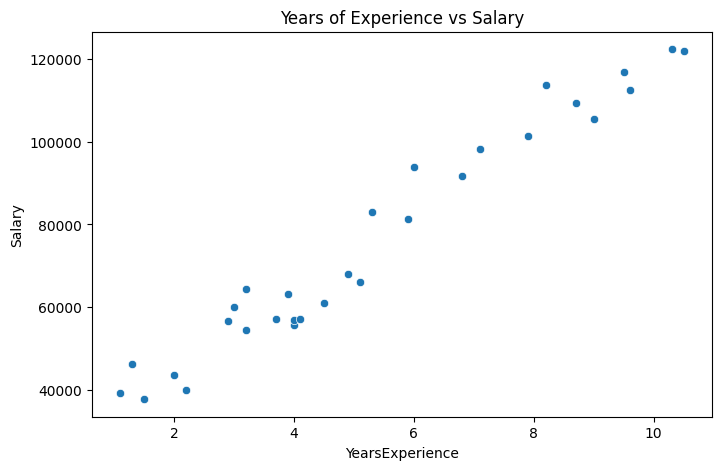

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary_df)
plt.title('Years of Experience vs Salary')
plt.show()

<br>**Check Correlation**

In [6]:
correlation = salary_df.corr()
print(correlation)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


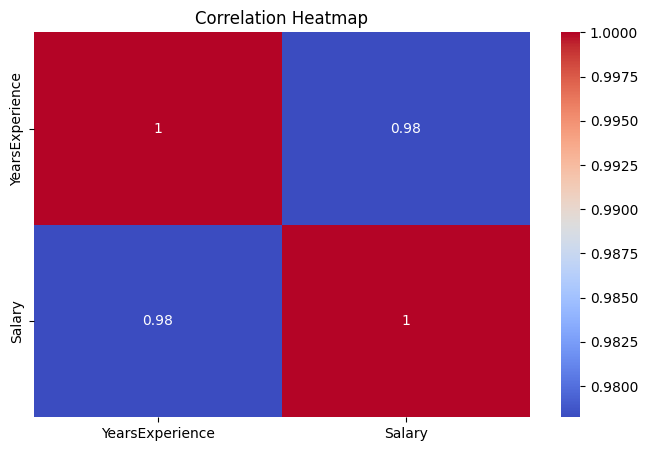

In [7]:
# Heatmap to check correlation
plt.figure(figsize=(8, 5))
sns.heatmap(salary_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


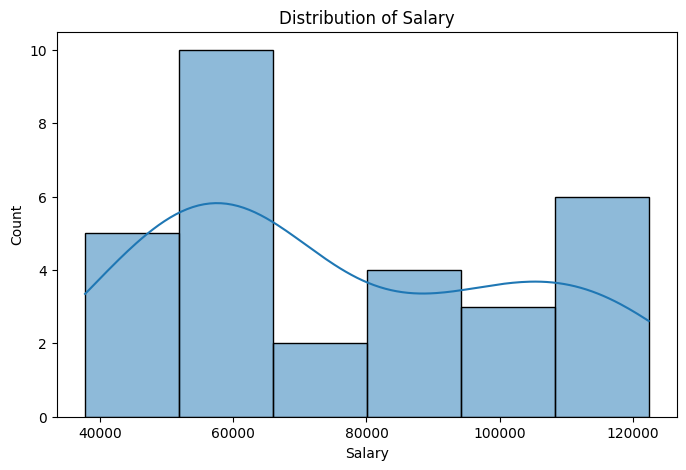

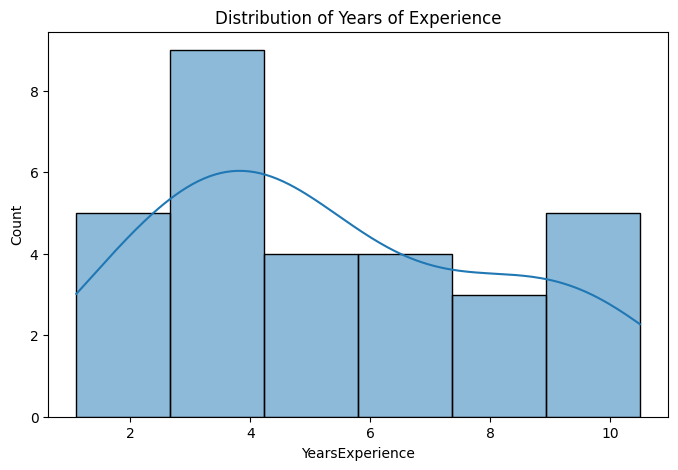

In [8]:
# Histogram of Salary
plt.figure(figsize=(8, 5))
sns.histplot(salary_df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.show()

# Histogram of Years of Experience
plt.figure(figsize=(8, 5))
sns.histplot(salary_df['YearsExperience'], kde=True)
plt.title('Distribution of Years of Experience')
plt.show()

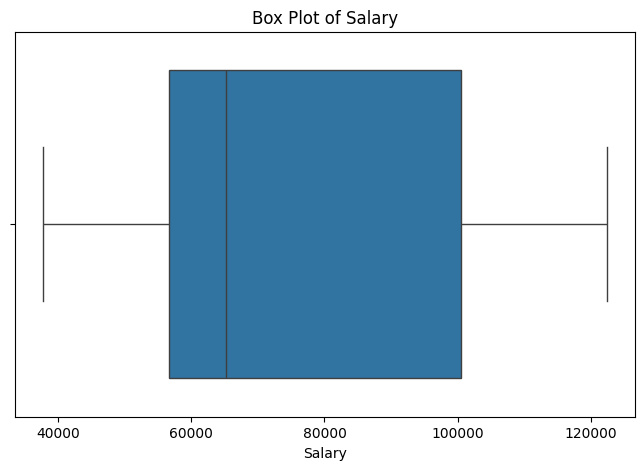

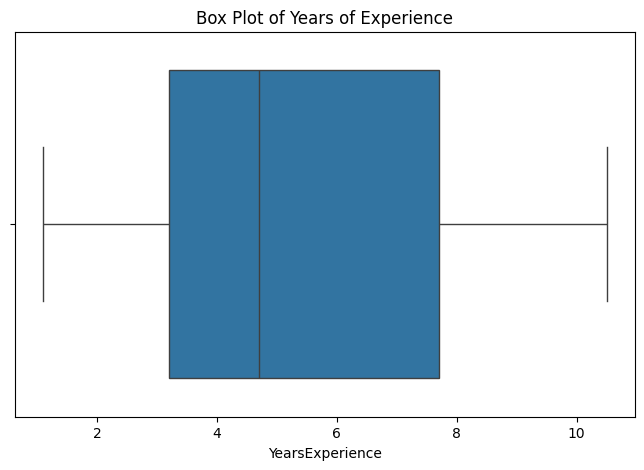

In [9]:
# Box plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=salary_df['Salary'])
plt.title('Box Plot of Salary')
plt.show()

# Box plot for Years of Experience
plt.figure(figsize=(8, 5))
sns.boxplot(x=salary_df['YearsExperience'])
plt.title('Box Plot of Years of Experience')
plt.show()


<br>**Splitting the Data into Train and Test sets**

In [10]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

<br>**Scale the feature (YearsExperience) and target (Salary)**

In [11]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [12]:
# X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler.fit_transform(y)

<br>**Train Test Split**

In [13]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [14]:
print(f"X_train Shape {X_train.shape}, X_test shape {X_test.shape}")
print(f"y_train Shape_{y_train_scaled.shape}, y_test shape {y_test_scaled.shape}")

X_train Shape (24, 1), X_test shape (6, 1)
y_train Shape_(24, 1), y_test shape (6, 1)


<br>**Fit the linear regression model**

In [15]:
model = LinearRegression()
model.fit(X_train, y_train_scaled)


LinearRegression()

<br>**Make Prediction**

In [16]:
y_pred_scaled = model.predict(X_test)

<br>**Accuracy Metrics**

In [17]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse = mse ** 0.5
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Square: {r2}')


Mean Squared Error: 0.0685893289650704
Root Mean Squared Error: 0.2618956451815692
R Square: 0.9024461774180498


<br>**Inverse transform the predicted salaries back to original scale**

In [18]:
y_pred_original = scaler.inverse_transform(y_pred_scaled)
y_test_orignal = scaler.inverse_transform(y_test_scaled)

<br>**Plotting the original data and the regression line**

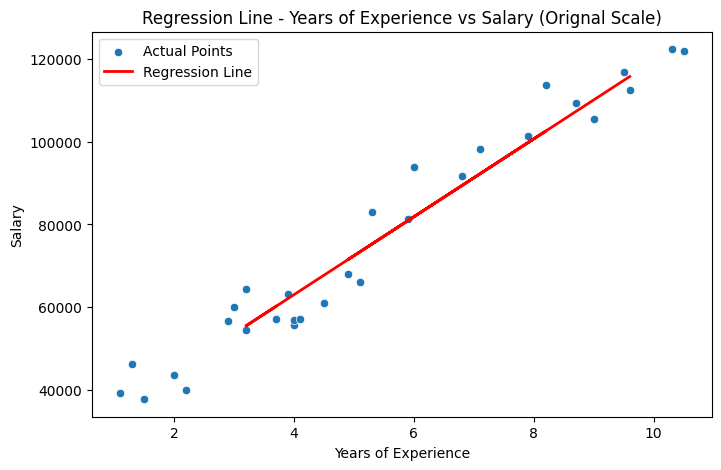

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary_df, label = 'Actual Points')
 
# plt.scatter(x = X_test, y=y_test_orignal)
plt.plot(X_test, y_pred_original, color='red', linewidth=2, label = "Regression Line")
plt.title('Regression Line - Years of Experience vs Salary (Orignal Scale)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()